In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

Discovering the prescraped data
Each row represents one polling station ("УИК"/"UIK")

In [38]:
uiks = pd.read_csv(filepath_or_buffer='../data/duma2021/edata.csv', index_col=0)
uiks

,name,region,kprf,er,voted,total_voters,lat,lon
0,УИК №592,Алтайский край,57,49,178,385,51.885025,85.307478
1,УИК №593,Алтайский край,189,174,569,1515,51.934707,85.326494
2,УИК №594,Алтайский край,157,141,464,1175,51.930130,85.333621
3,УИК №595,Алтайский край,303,339,962,2257,51.943233,85.336853
4,УИК №596,Алтайский край,264,282,843,1924,51.961639,85.335227
...,...,...,...,...,...,...,...,...
96302,УИК №187,город Севастополь,261,791,1586,2286,44.773268,33.544332
96303,УИК №188,город Севастополь,111,431,905,1589,44.773268,33.544332
96304,УИК №189,город Севастополь,112,306,634,1333,44.815350,33.560437
96305,УИК №190,город Севастополь,145,346,660,1235,44.786191,33.616072


Plotting the distribution of turnouts (expecting normality)

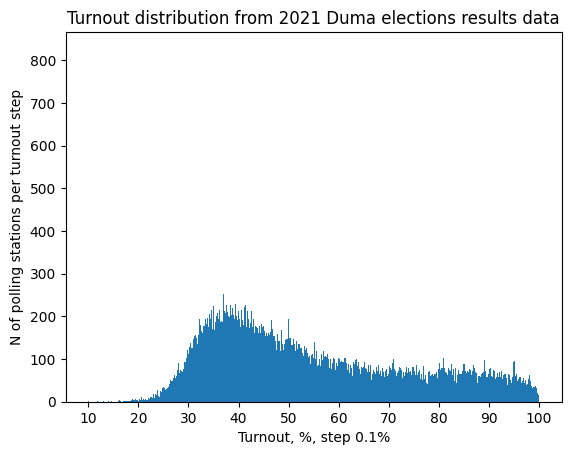

In [51]:
uiks = uiks[uiks['kprf']>10]
uiks = uiks[uiks['er']>10]
uiks['percent'] = uiks['er'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']
turnout_percentage = uiks['voted']/uiks['total_voters'] * 100


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# minor_ticks = np.arange(0, 101, 1)
# ax.set_xticks(minor_ticks, minor=True)
major_ticks = np.arange(0, 101, 10)
ax.set_xticks(major_ticks)
ax.set_title('Turnout distribution from 2021 Duma elections results data')
ax.set_xlabel('Turnout, %, step 0.1%')
ax.set_ylabel('N of polling stations per turnout step')

# ax.grid(color='r', which='minor', linestyle='-', linewidth=.1)
# ax.grid(color='r', which='major', linestyle='-', linewidth=.2)
# ax.axvline(x = 85, color = 'r', label = 'axvline - full height', linewidth=.1, )
ax.hist(x=turnout_percentage, bins=1000)
plt.show()

Apart from being skewed, the graph shows another 'interesting' feature: a large number of peaks. Let's see how the peaks lay on the grid of the integer range

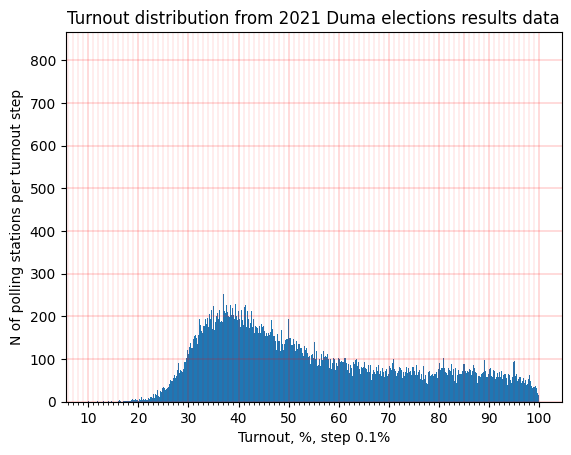

In [ ]:
uiks = uiks[uiks['kprf']>10]
uiks = uiks[uiks['er']>10]
uiks['percent'] = uiks['er'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']
turnout_percentage = uiks['voted']/uiks['total_voters'] * 100


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 101, 1)
ax.set_xticks(minor_ticks, minor=True)
major_ticks = np.arange(0, 101, 10)
ax.set_xticks(major_ticks)
ax.set_title('Turnout distribution from 2021 Duma elections results data')
ax.set_xlabel('Turnout, %, step 0.1%')
ax.set_ylabel('N of polling stations per turnout step, %')

ax.grid(color='r', which='minor', linestyle='-', linewidth=.1)
ax.grid(color='r', which='major', linestyle='-', linewidth=.2)
ax.axvline(x = 85, color = 'r', label = 'axvline - full height', linewidth=.1, )
ax.hist(x=turnout_percentage, bins=1000)
plt.show()

Looking closer, we can notice almost all the peaks lie on integer scale


Now let's plot the number of voters for the officially winning party against the turnout (we are again expecting normality for each turnout percentage)

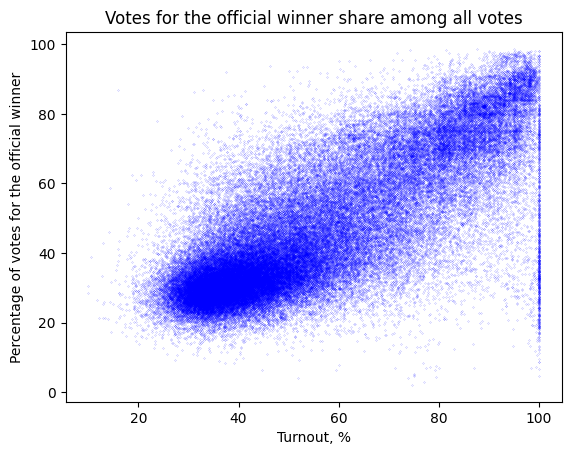

In [ ]:

uiks = uiks[uiks['kprf']>10]
uiks = uiks[uiks['er']>10]
uiks['percent'] = uiks['er'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# minor_ticks = np.arange(0, 101, 1)
# ax.set_xticks(minor_ticks, minor=True)
# major_ticks = np.arange(0, 101, 10)
# ax.set_xticks(major_ticks)
ax.set_title('Votes for the official winner share among all votes')
ax.set_xlabel('Turnout, %')
ax.set_ylabel('Percentage of votes for the official winner, %')

# ax.grid(color='r', which='minor', linestyle='-', linewidth=.1)
# ax.grid(color='r', which='major', linestyle='-', linewidth=.2)
# ax.axvline(x = 85, color = 'r', label = 'axvline - full height', linewidth=.1, )
ax.scatter(uiks['turnout']*100, uiks['percent']*100, color='blue', s=0.01)
plt.show()

At the top right we can observe a grid-looking pattern anomaly, let's see how if fits the integer scale

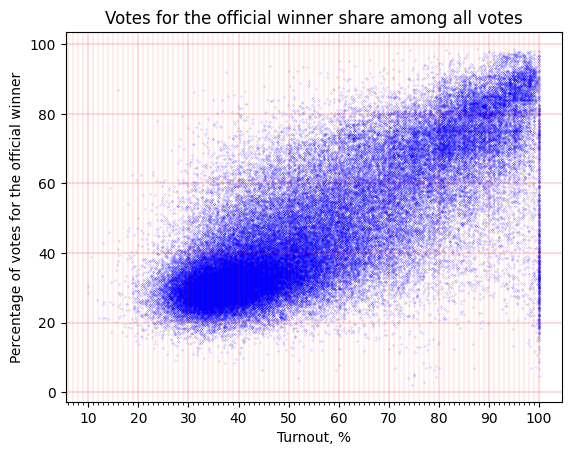

In [ ]:

uiks = uiks[uiks['kprf']>10]
uiks = uiks[uiks['er']>10]
uiks['percent'] = uiks['er'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 101, 1)
ax.set_xticks(minor_ticks, minor=True)
major_ticks = np.arange(0, 101, 10)
ax.set_xticks(major_ticks)
ax.set_title('Votes for the official winner share among all votes')
ax.set_xlabel('Turnout, %')
ax.set_ylabel('Percentage of votes for the official winner, %')

ax.grid(color='r', which='minor', linestyle='-', linewidth=.1)
ax.grid(color='r', which='major', linestyle='-', linewidth=.2)
# ax.axvline(x = 85, color = 'r', label = 'axvline - full height', linewidth=.1, )
ax.scatter(uiks['turnout']*100, uiks['percent']*100, color='blue', s=0.01)
plt.show()

Lastly, let's scatter plot the winner party's (ER) voted vs turnout together with the main opponing party's votes (KPRF)

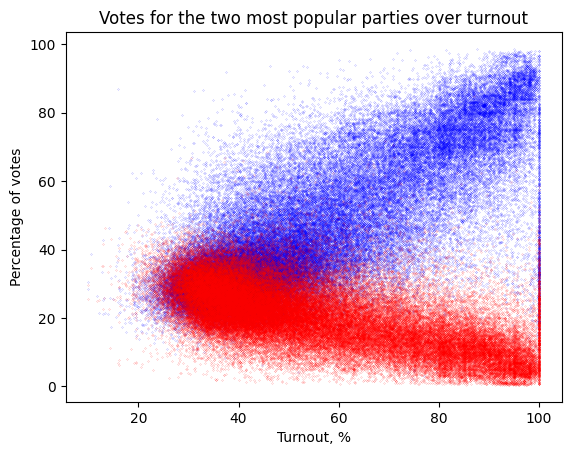

In [ ]:
uiks = uiks[uiks['kprf']>10]
uiks = uiks[uiks['er']>10]
uiks['er_percent'] = uiks['er'] / (uiks['voted'])
uiks['kprf_percent'] = uiks['kprf'] / (uiks['voted'])
uiks['turnout'] = uiks['voted']/uiks['total_voters']



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# minor_ticks = np.arange(0, 101, 1)
# ax.set_xticks(minor_ticks, minor=True)
# major_ticks = np.arange(0, 101, 10)
# ax.set_xticks(major_ticks)
ax.set_title('Votes for the two most popular parties over turnout')
ax.set_xlabel('Turnout, %')
ax.set_ylabel('Percentage of votes, %')

# ax.grid(color='r', which='minor', linestyle='-', linewidth=.1)
# ax.grid(color='r', which='major', linestyle='-', linewidth=.2)
# ax.axvline(x = 85, color = 'r', label = 'axvline - full height', linewidth=.1, )
ax.scatter(uiks['turnout']*100, uiks['er_percent']*100, color='blue', s=0.01)
ax.scatter(uiks['turnout']*100, uiks['kprf_percent']*100, color='red', s=0.01)
plt.show()